# 1.	Data Cleaning and Preprocessing:
•	Verify data consistency, particularly among income and spending columns.
•	Normalize or scale continuous features (e.g., income, rent, insurance) for model compatibility.
•	Encode categorical variables such as "Occupation" and "City_Tier" for machine learning models.


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load original dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\Income and Potential Savings.csv')  

# Define columns for processing
numerical_cols = [
    'Income', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries',
    'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
    'Healthcare', 'Education', 'Miscellaneous', 'Age', 'Dependents'
]
categorical_cols = ['Occupation', 'City_Tier']

# Preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Apply transformation
X = df[numerical_cols + categorical_cols]
X_processed = preprocessor.fit_transform(X)

# Extract encoded column names
encoded_cat_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
processed_column_names = numerical_cols + list(encoded_cat_names)

# Create DataFrame from processed features
X_processed_df = pd.DataFrame(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed,
                              columns=processed_column_names)

# Drop the raw columns used for preprocessing from original dataframe
df_remaining = df.drop(columns=numerical_cols + categorical_cols)

# Combine processed features with the rest of the original data
final_df = pd.concat([df_remaining.reset_index(drop=True), X_processed_df.reset_index(drop=True)], axis=1)

# Save to CSV
output_path = r'C:\Users\HP\Downloads\cleaned_Income and Potential Savings.csv'
final_df.to_csv(output_path, index=False)
print(f"✅ All columns saved to: {output_path}")


✅ All columns saved to: C:\Users\HP\Downloads\cleaned_Income and Potential Savings.csv


In [ ]:
# This code will:

Check for invalid data

Normalize all relevant numeric columns

Encode the categorical fields using one-hot encoding

Output a clean, ready-to-use DataFrame for modeling

In [ ]:
# 2. Exploratory Data Analysis (EDA):
•	Visualize relationships between income, spending categories, and disposable income.
•	Analyze how factors like age, occupation, and city tier influence disposable income and savings potential.
•	Examine spending trends and saving potentials by spending categories (e.g., groceries, transport, entertainment).

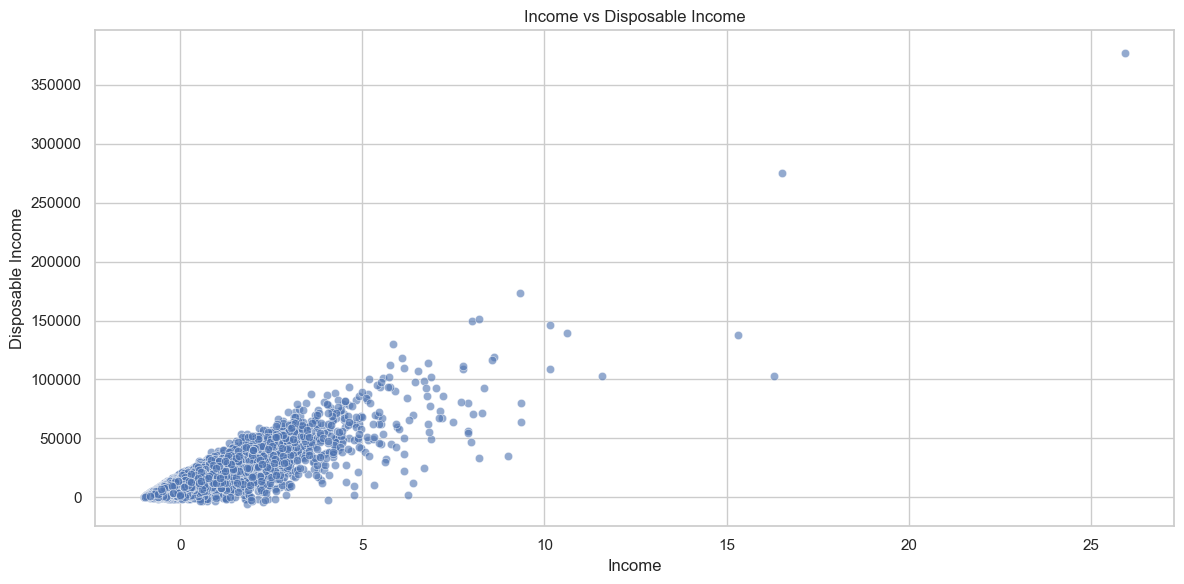

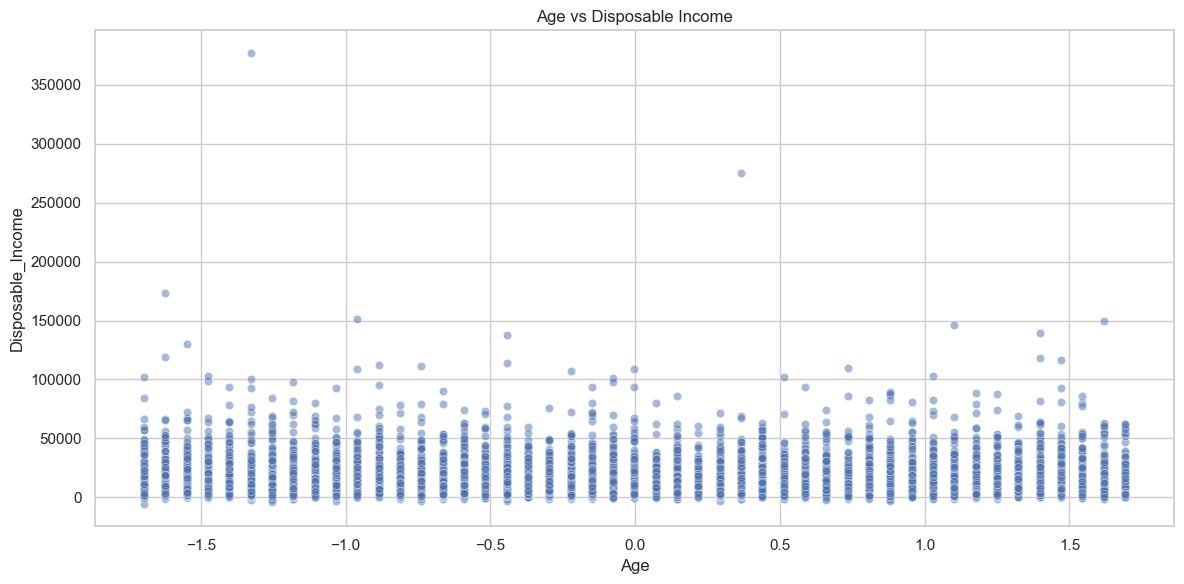

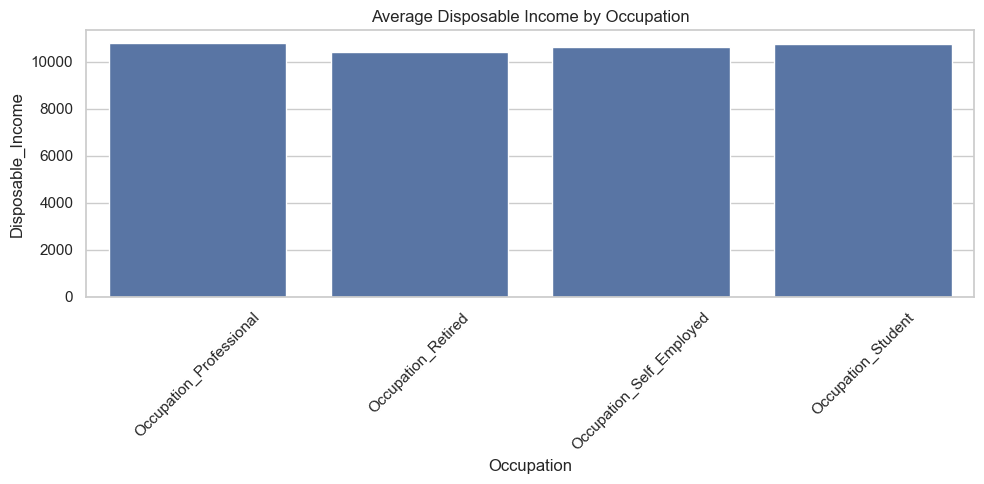

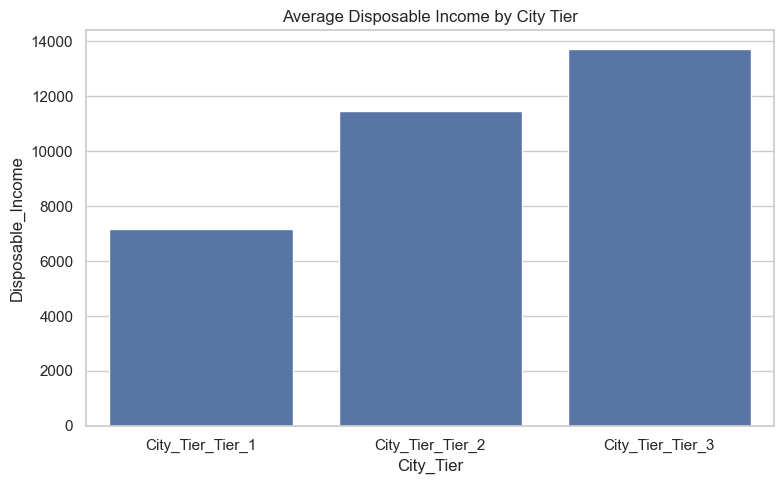

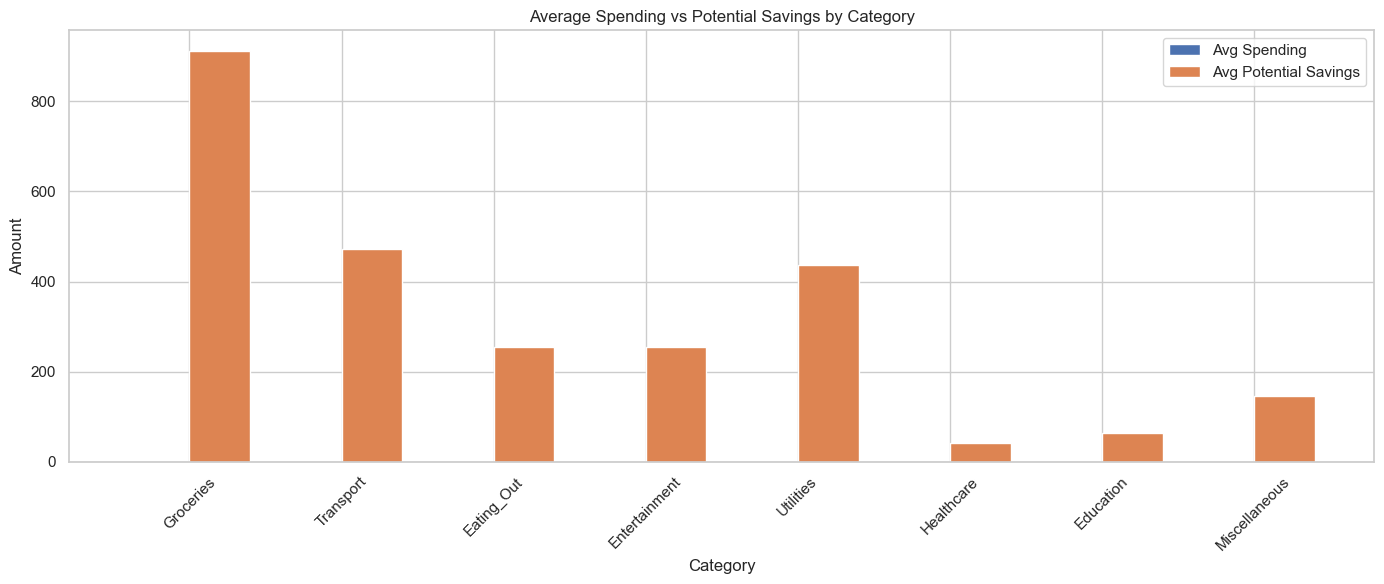

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\cleaned_Income and Potential Savings.csv')
sns.set(style="whitegrid")

# -----
# 1. Relationship: Income, Spending, Disposable Income
# -----
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Income', y='Disposable_Income', alpha=0.6)
plt.title('Income vs Disposable Income')
plt.xlabel('Income')
plt.ylabel('Disposable Income')
plt.tight_layout()
plt.show()

# -----
# 2. Influence of Age, Occupation, City Tier
# -----

# Age vs Disposable Income
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Disposable_Income', alpha=0.5)
plt.title('Age vs Disposable Income')
plt.tight_layout()
plt.show()

# Occupation vs Disposable Income (One-hot encoded)
occupation_cols = [col for col in df.columns if col.startswith('Occupation_')]
occupation_melted = df[occupation_cols + ['Disposable_Income']].melt(id_vars='Disposable_Income', 
                                var_name='Occupation', value_name='Present')
occupation_avg = occupation_melted[occupation_melted['Present'] == 1].groupby('Occupation')['Disposable_Income'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=occupation_avg, x='Occupation', y='Disposable_Income')
plt.title('Average Disposable Income by Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# City Tier vs Disposable Income (One-hot encoded)
city_cols = [col for col in df.columns if col.startswith('City_Tier_')]
city_melted = df[city_cols + ['Disposable_Income']].melt(id_vars='Disposable_Income', 
                                var_name='City_Tier', value_name='Present')
city_avg = city_melted[city_melted['Present'] == 1].groupby('City_Tier')['Disposable_Income'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=city_avg, x='City_Tier', y='Disposable_Income')
plt.title('Average Disposable Income by City Tier')
plt.tight_layout()
plt.show()

# -----
# 3. Spending Trends vs Potential Savings by Category
# -----
spending_categories = ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 
                       'Utilities', 'Healthcare', 'Education', 'Miscellaneous']
savings_columns = [f'Potential_Savings_{cat}' for cat in spending_categories]

avg_spending = df[spending_categories].mean().reset_index()
avg_spending.columns = ['Category', 'Average_Spending']

avg_savings = df[savings_columns].mean().reset_index()
avg_savings.columns = ['Category', 'Average_Savings']
avg_savings['Category'] = avg_savings['Category'].str.replace('Potential_Savings_', '')

summary_df = pd.merge(avg_spending, avg_savings, on='Category')

# Plot spending vs savings
plt.figure(figsize=(14, 6))
bar_width = 0.4
index = range(len(summary_df))

plt.bar(index, summary_df['Average_Spending'], bar_width, label='Avg Spending')
plt.bar([i + bar_width for i in index], summary_df['Average_Savings'], bar_width, label='Avg Potential Savings')

plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Average Spending vs Potential Savings by Category')
plt.xticks([i + bar_width / 2 for i in index], summary_df['Category'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# ✅ Explore:
Income, spending, and disposable income

Impact of age, occupation, and city tier

Spending trends vs potential savings

In [ ]:
# 3.	Feature Engineering:
•	Create new features if necessary, such as percentage of income spent on each category or ratio of dependents to income.
•	Derive insights from spending patterns to enhance predictive power.

In [10]:
import pandas as pd

# Load data
df = pd.read_csv(r'C:\Users\HP\Downloads\cleaned_Income and Potential Savings.csv')

# List of spending columns
spending_cols = ['Groceries', 'Transport', 'Eating_Out', 'Entertainment',
                 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']

# 1. Create % of income spent on each category
for col in spending_cols:
    df[f'Pct_Income_{col}'] = df[col] / df['Income']

# 2. Total spending & total percentage
df['Total_Spending'] = df[spending_cols].sum(axis=1)
df['Pct_Income_Total_Spending'] = df['Total_Spending'] / df['Income']

# 3. Dependents to Income ratio
df['Dependents_to_Income_Ratio'] = df['Dependents'] / df['Income']

# 4. High Spender flag (spends more than 80% of income)
df['High_Spender'] = (df['Pct_Income_Total_Spending'] > 0.8).astype(int)

# 5. Savings efficiency (Potential Savings / Disposable Income)
potential_savings_cols = [f'Potential_Savings_{col}' for col in spending_cols]
df['Potential_Savings_Total'] = df[potential_savings_cols].sum(axis=1)
df['Savings_Efficiency'] = df['Potential_Savings_Total'] / df['Disposable_Income']

# Replace infs and NaNs from divisions
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.fillna(0, inplace=True)

# Save engineered dataset
output_path = r'C:\Users\HP\Downloads\engineered_income_savings.csv'
df.to_csv(output_path, index=False)

print(f"✅ Feature-engineered dataset saved to:\n{output_path}")


✅ Feature-engineered dataset saved to:
C:\Users\HP\Downloads\engineered_income_savings.csv


In [ ]:
# ✅ Part 1: Create New Features
We'll engineer these:

Spending % by category = Spending / Income

Total spending % = Total_Spending / Income

Dependents to Income ratio

High_spender flag – Flag if user spends >80% of income

Savings_efficiency = Potential_Savings_Total / Disposable_Income

In [ ]:
# 🚀 Resulting New Columns:
Pct_Income_Groceries, Pct_Income_Transport, ...

Total_Spending, Pct_Income_Total_Spending

Dependents_to_Income_Ratio

High_Spender (0 or 1)

Savings_Efficiency

In [ ]:
# 4.	Model Development:
•	Separate the data into features and targets: use features to predict Disposable_Income and Potential Savings in key spending categories.
•	Train regression models (e.g., linear regression, random forest regressor) to predict both disposable income and individual savings potentials.
•	Evaluate the models using RMSE, MAE, or R² metrics.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Load dataset
df = pd.read_csv(r'C:\Users\HP\Downloads\engineered_income_savings.csv')

# Define target columns to predict
target_cols = [
    'Disposable_Income',
    'Potential_Savings_Groceries',
    'Potential_Savings_Transport',
    'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment'
]

# Remove target columns and derived features from input features
exclude_from_features = target_cols + [
    'Desired_Savings', 'Desired_Savings_Percentage',
    'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
    'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
    'Potential_Savings_Total'  # avoid leakage
]
X = df.drop(columns=exclude_from_features)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 Evaluation for {model_name}:")
    print(f"  MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  RMSE : {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"  R²   : {r2_score(y_true, y_pred):.4f}")

# Iterate over each target
for target in target_cols:
    print(f"\n📊 Predicting: {target}")
    y = df[target]

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model 1: Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    evaluate_model(y_test, y_pred_lr, f"Linear Regression ({target})")

    # Model 2: Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    evaluate_model(y_test, y_pred_rf, f"Random Forest ({target})")



📊 Predicting: Disposable_Income

🔍 Evaluation for Linear Regression (Disposable_Income):
  MAE  : 0.00
  RMSE : 0.00
  R²   : 1.0000

🔍 Evaluation for Random Forest (Disposable_Income):
  MAE  : 840.13
  RMSE : 3683.97
  R²   : 0.9137

📊 Predicting: Potential_Savings_Groceries

🔍 Evaluation for Linear Regression (Potential_Savings_Groceries):
  MAE  : 324.48
  RMSE : 568.67
  R²   : 0.7364

🔍 Evaluation for Random Forest (Potential_Savings_Groceries):
  MAE  : 281.66
  RMSE : 556.73
  R²   : 0.7473

📊 Predicting: Potential_Savings_Transport

🔍 Evaluation for Linear Regression (Potential_Savings_Transport):
  MAE  : 175.70
  RMSE : 325.47
  R²   : 0.6501

🔍 Evaluation for Random Forest (Potential_Savings_Transport):
  MAE  : 171.89
  RMSE : 297.31
  R²   : 0.7081

📊 Predicting: Potential_Savings_Eating_Out

🔍 Evaluation for Linear Regression (Potential_Savings_Eating_Out):
  MAE  : 90.15
  RMSE : 149.85
  R²   : 0.7659

🔍 Evaluation for Random Forest (Potential_Savings_Eating_Out):
  M

# The code loads a cleaned dataset and trains two regression models—Linear Regression and Random Forest—to predict disposable income and potential savings across categories like groceries and transport. It removes any target or derived columns from the input features to prevent data leakage, splits the data into training and testing sets, fits both models, and evaluates them using MAE, RMSE, and R² metrics to compare performance.

In [ ]:
# 5.	Model Evaluation:
•	Test model accuracy and ensure it generalizes well to unseen data.
•	Fine-tune model parameters to improve performance.


📊 Training and tuning: Disposable_Income
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Model saved to: saved_models/rf_model_Disposable_Income.pkl

🔍 Evaluation for Random Forest (Disposable_Income):
  MAE  : 845.25
  RMSE : 3841.72
  R²   : 0.9062


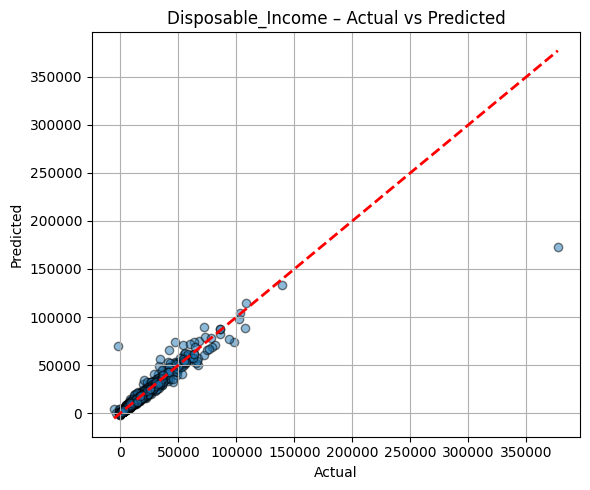


📊 Training and tuning: Potential_Savings_Groceries
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Model saved to: saved_models/rf_model_Potential_Savings_Groceries.pkl

🔍 Evaluation for Random Forest (Potential_Savings_Groceries):
  MAE  : 282.12
  RMSE : 569.56
  R²   : 0.7355


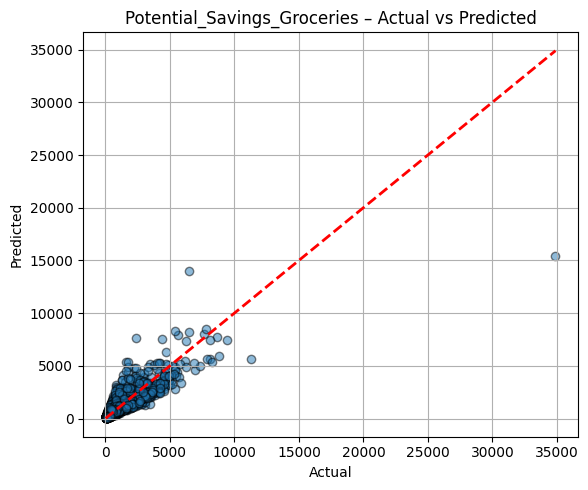


📊 Training and tuning: Potential_Savings_Transport
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Model saved to: saved_models/rf_model_Potential_Savings_Transport.pkl

🔍 Evaluation for Random Forest (Potential_Savings_Transport):
  MAE  : 170.85
  RMSE : 293.55
  R²   : 0.7154


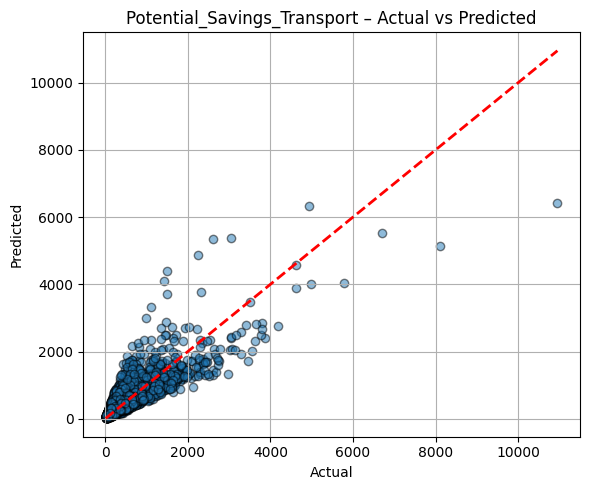


📊 Training and tuning: Potential_Savings_Eating_Out
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Model saved to: saved_models/rf_model_Potential_Savings_Eating_Out.pkl

🔍 Evaluation for Random Forest (Potential_Savings_Eating_Out):
  MAE  : 90.34
  RMSE : 152.03
  R²   : 0.7591


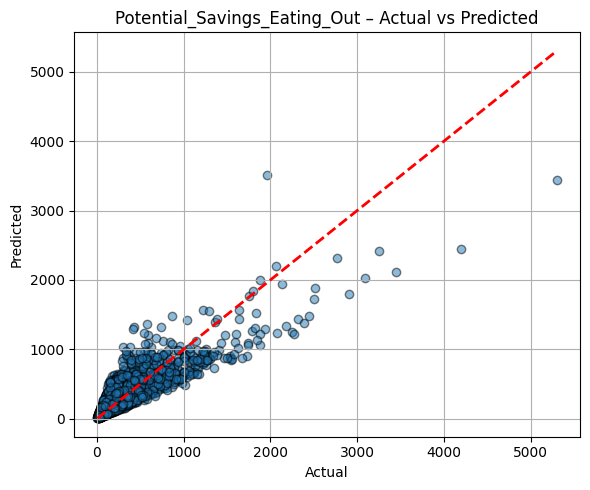


📊 Training and tuning: Potential_Savings_Entertainment
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Model saved to: saved_models/rf_model_Potential_Savings_Entertainment.pkl

🔍 Evaluation for Random Forest (Potential_Savings_Entertainment):
  MAE  : 87.61
  RMSE : 144.00
  R²   : 0.7576


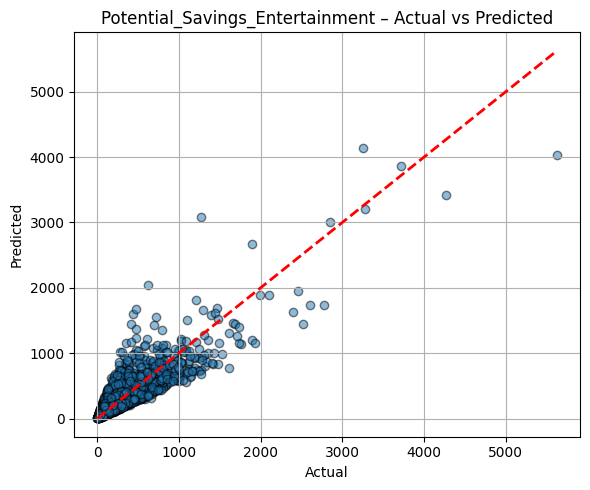

In [1]:
import pandas as pd
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# 1. Load data
df = pd.read_csv(r'C:\Users\HP\Downloads\engineered_income_savings.csv')

# 2. Define target columns
target_cols = [
    'Disposable_Income',
    'Potential_Savings_Groceries',
    'Potential_Savings_Transport',
    'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment'
]

# 3. Define input features (drop targets and derived columns)
exclude_from_features = target_cols + [
    'Desired_Savings', 'Desired_Savings_Percentage',
    'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
    'Potential_Savings_Education', 'Potential_Savings_Miscellaneous',
    'Potential_Savings_Total'
]
X = df.drop(columns=exclude_from_features)

# 4. Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 Evaluation for {model_name}:")
    print(f"  MAE  : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  RMSE : {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"  R²   : {r2_score(y_true, y_pred):.4f}")

# 5. Define plotting function
def plot_predictions(y_true, y_pred, target):
    plt.figure(figsize=(6, 5))
    plt.scatter(y_true, y_pred, alpha=0.5, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{target} – Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 6. Define hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 7. Create directory to save models
os.makedirs('saved_models', exist_ok=True)

# 8. Train and evaluate model for each target
for target in target_cols:
    print(f"\n📊 Training and tuning: {target}")
    y = df[target]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest and tuning
    rf = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(
        rf, param_distributions=param_dist, n_iter=10, cv=3,
        n_jobs=-1, scoring='r2', random_state=42, verbose=1
    )
    random_search.fit(X_train, y_train)

    # Best model
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Save model
    model_path = f'saved_models/rf_model_{target}.pkl'
    joblib.dump(best_model, model_path)
    print(f"✅ Model saved to: {model_path}")

    # Evaluate and plot
    evaluate_model(y_test, y_pred, f"Random Forest ({target})")
    plot_predictions(y_test, y_pred, target)


In [1]:
%%writefile app002.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

# Load data
DATA_PATH = r'C:\Users\HP\Downloads\engineered_income_savings.csv'
df = pd.read_csv(DATA_PATH)

# Define prediction targets
targets = [
    'Disposable_Income', 'Desired_Savings', 'Potential_Savings_Groceries',
    'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
    'Potential_Savings_Healthcare', 'Potential_Savings_Education',
    'Potential_Savings_Miscellaneous'
]

# Remove targets from features
X = df.drop(columns=targets)
topredict_features = X.columns.tolist()

# Save for reuse
joblib.dump(topredict_features, "feature_columns.pkl")

# Train and save models
for target in targets:
    model = RandomForestRegressor(random_state=42)
    model.fit(X, df[target])
    joblib.dump(model, f"model_{target}.pkl")

# Streamlit UI
st.title("💸 Income & Savings Predictor")
st.write("Enter your financial and demographic info to predict your disposable income and potential savings!")

# Gather user inputs
user_input = {}
for feature in topredict_features:
    if "Occupation_" in feature or "City_Tier_" in feature:
        continue
    elif feature in ["Income", "Rent", "Loan_Repayment", "Insurance", "Age"]:
        user_input[feature] = st.number_input(f"{feature.replace('_', ' ')}", min_value=0.0, step=100.0)
    elif feature == "Dependents":
        user_input[feature] = st.number_input("Dependents", min_value=0, step=1)
    elif feature in ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']:
        user_input[feature] = st.number_input(f"Monthly {feature.replace('_', ' ')}", min_value=0.0, step=50.0)

# Encode Occupation
occupation = st.selectbox("Occupation", ["Professional", "Retired", "Self_Employed", "Student"])
for occ in ["Occupation_Professional", "Occupation_Retired", "Occupation_Self_Employed", "Occupation_Student"]:
    user_input[occ] = 1 if occ.split("_")[1] == occupation else 0

# Encode City Tier
tier = st.selectbox("City Tier", ["Tier_1", "Tier_2", "Tier_3"])
for city in ["City_Tier_Tier_1", "City_Tier_Tier_2", "City_Tier_Tier_3"]:
    user_input[city] = 1 if city.split("_")[-1] == tier else 0

# Derived Features
total_spending = sum(user_input.get(cat, 0.0) for cat in ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous'])
income = user_input["Income"] if user_input["Income"] > 0 else 1  # prevent div by zero

for cat in ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']:
    user_input[f"Pct_Income_{cat}"] = user_input[cat] / income

user_input["Total_Spending"] = total_spending
user_input["Pct_Income_Total_Spending"] = total_spending / income
user_input["Dependents_to_Income_Ratio"] = user_input["Dependents"] / income
user_input["High_Spender"] = int(user_input["Pct_Income_Total_Spending"] > 0.7)
user_input["Savings_Efficiency"] = 1 - user_input["Pct_Income_Total_Spending"]

# Align input with feature columns
input_df = pd.DataFrame([user_input])
missing_cols = set(topredict_features) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0
input_df = input_df[topredict_features]

# Predict
if st.button("Predict"):
    st.subheader("📊 Results")
    for target in targets:
        model = joblib.load(f"model_{target}.pkl")
        prediction = model.predict(input_df)[0]
        st.write(f"**{target.replace('_', ' ')}**: ₹{prediction:,.2f}")


Writing app002.py


In [ ]:
# Run Streamlit in the background
! streamlit run app002.py & npx localtunnel --port 8501

In [1]:
%%writefile app0078.py
import streamlit as st
import pandas as pd
import joblib
import os

# ⚡️ Load features and models efficiently
@st.cache_resource
def load_feature_columns():
    return joblib.load("feature_columns.pkl")

@st.cache_resource
def load_models():
    models = {}
    for target in targets:
        models[target] = joblib.load(f"model_{target}.pkl")
    return models

# 🎯 Prediction targets
targets = [
    'Disposable_Income', 'Desired_Savings', 'Potential_Savings_Groceries',
    'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
    'Potential_Savings_Healthcare', 'Potential_Savings_Education',
    'Potential_Savings_Miscellaneous'
]

topredict_features = load_feature_columns()
models = load_models()

# 🎨 Streamlit UI
st.title("💸 Fast Income & Savings Predictor")

# 🧾 User Inputs
user_input = {}
for feature in topredict_features:
    if "Occupation_" in feature or "City_Tier_" in feature:
        continue
    elif feature in ["Income", "Rent", "Loan_Repayment", "Insurance", "Age"]:
        user_input[feature] = st.number_input(f"{feature.replace('_', ' ')}", min_value=0.0, step=100.0)
    elif feature == "Dependents":
        user_input[feature] = st.number_input("Dependents", min_value=0, step=1)
    elif feature in ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']:
        user_input[feature] = st.number_input(f"Monthly {feature.replace('_', ' ')}", min_value=0.0, step=50.0)

# 🔠 Encodings
occupation = st.selectbox("Occupation", ["Professional", "Retired", "Self_Employed", "Student"])
for occ in ["Occupation_Professional", "Occupation_Retired", "Occupation_Self_Employed", "Occupation_Student"]:
    user_input[occ] = 1 if occ.split("_")[1] == occupation else 0

tier = st.selectbox("City Tier", ["Tier_1", "Tier_2", "Tier_3"])
for city in ["City_Tier_Tier_1", "City_Tier_Tier_2", "City_Tier_Tier_3"]:
    user_input[city] = 1 if city.split("_")[-1] == tier else 0

# 🧮 Derived Features
total_spending = sum(user_input.get(cat, 0.0) for cat in ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous'])
income = user_input.get("Income", 0.0) or 1

for cat in ['Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous']:
    user_input[f"Pct_Income_{cat}"] = user_input[cat] / income

user_input["Total_Spending"] = total_spending
user_input["Pct_Income_Total_Spending"] = total_spending / income
user_input["Dependents_to_Income_Ratio"] = user_input["Dependents"] / income
user_input["High_Spender"] = int(user_input["Pct_Income_Total_Spending"] > 0.7)
user_input["Savings_Efficiency"] = 1 - user_input["Pct_Income_Total_Spending"]

# 📥 Prepare input DataFrame
input_df = pd.DataFrame([user_input])
missing_cols = set(topredict_features) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0
input_df = input_df[topredict_features]

# 🔮 Predict
if st.button("Predict"):
    st.subheader("📊 Results")
    for target in targets:
        prediction = models[target].predict(input_df)[0]
        st.write(f"**{target.replace('_', ' ')}**: ₹{prediction:,.2f}")


Writing app0078.py


In [ ]:
# Run Streamlit in the background
! streamlit run app0078.py & npx localtunnel --port 8501

In [ ]:
# 7.	Interpretation of Results and Recommendations:
•	Present insights on potential savings based on various factors.
•	Provide personalized tips for saving across different expense categories.

In [1]:
import pandas as pd
import joblib

# Load data
df = pd.read_csv(r'C:\Users\HP\Downloads\engineered_income_savings.csv')

# Load saved feature list
feature_columns = joblib.load("feature_columns.pkl")

# Load trained models
models = {}
targets = [
    'Disposable_Income', 'Desired_Savings', 'Potential_Savings_Groceries',
    'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
    'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
    'Potential_Savings_Healthcare', 'Potential_Savings_Education',
    'Potential_Savings_Miscellaneous'
]

for target in targets:
    models[target] = joblib.load(f"model_{target}.pkl")

# Take the first user from the dataset for demonstration
user_input = df[feature_columns].iloc[0:1]

# Predict core metrics
disposable_income = models["Disposable_Income"].predict(user_input)[0]
desired_savings = models["Desired_Savings"].predict(user_input)[0]

print("📊 Prediction Summary")
print(f"Disposable Income: ₹{disposable_income:,.2f}")
print(f"Desired Savings: ₹{desired_savings:,.2f}")

if disposable_income < desired_savings:
    print("\n⚠️ Warning: Disposable income is less than desired savings.")
    print("Tip: Reduce non-essential spending to achieve your savings goal.")
else:
    print("\n✅ Good job! Your disposable income can support your savings goal.")

# Provide category-wise savings suggestions
print("\n💡 Category-wise Savings Opportunities:")
categories = [
    'Groceries', 'Transport', 'Eating_Out', 'Entertainment',
    'Utilities', 'Healthcare', 'Education', 'Miscellaneous'
]

for cat in categories:
    key = f"Potential_Savings_{cat}"
    saving = models[key].predict(user_input)[0]
    if saving > 0:
        print(f"- {cat}: Save up to ₹{saving:,.2f}/month. Try discounts or budgeting tools.")


📊 Prediction Summary
Disposable Income: ₹11,272.26
Desired Savings: ₹6,196.33

✅ Good job! Your disposable income can support your savings goal.

💡 Category-wise Savings Opportunities:
- Groceries: Save up to ₹1,661.30/month. Try discounts or budgeting tools.
- Transport: Save up to ₹393.70/month. Try discounts or budgeting tools.
- Eating_Out: Save up to ₹424.93/month. Try discounts or budgeting tools.
- Entertainment: Save up to ₹229.84/month. Try discounts or budgeting tools.
- Utilities: Save up to ₹637.46/month. Try discounts or budgeting tools.
- Healthcare: Save up to ₹59.29/month. Try discounts or budgeting tools.
- Miscellaneous: Save up to ₹108.85/month. Try discounts or budgeting tools.
